<a href="https://colab.research.google.com/github/saisadhu/loan-default-prediction-/blob/main/data_science_project_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#  Handling imbalance
from imblearn.over_sampling import SMOTE

#  Save model
import joblib

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#  Load Dataset

df = pd.read_csv("Loan Default Prediction Dataset.csv")

#  Basic Information
print(" Dataset Shape:", df.shape)
print("\n First 5 Rows:")
print(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Data Description:")
print(df.describe(include='all'))

 Dataset Shape: (141659, 18)

 First 5 Rows:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes     

In [ ]:
# Drop non-informative column
if "LoanID" in df.columns:
    df.drop("LoanID", axis=1, inplace=True)

In [ ]:
# Encode Categorical Variables
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

In [ ]:
#  Handle Missing Values (drop or impute)
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [ ]:
# Imputation or dropping
df.dropna(inplace=True)

In [ ]:
# Scale Numerical Features
numeric_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
#  Show cleaned data
print("\n Cleaned and Preprocessed Data Sample:")
print(df.head())


 Cleaned and Preprocessed Data Sample:
        Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.833179  0.088727   -1.085894    -0.342401        0.591174   
1  1.700989 -0.823924   -0.044075    -0.732900       -1.285623   
2  0.165633  0.042892    0.022903    -0.776989       -0.968011   
3 -0.768931 -1.304322   -1.167544     1.062138       -1.718730   
4  1.100198 -1.593706   -1.670587     0.369316       -1.487739   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0        1.344189      0.260623 -0.001759 -0.262024          0   
1       -1.340985     -1.308509  1.413882  0.777989          2   
2        0.449131      1.155119 -0.709579 -0.825364          2   
3        0.449131     -0.968179 -0.709579 -1.172035          1   
4        1.344189     -1.052509  0.706061  0.994658          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1            4   
1           

In [ ]:
df['DTI_Level'] = pd.cut(df['DTIRatio'], bins=[-np.inf, 0.2, 0.4, 0.6, 0.8, np.inf], labels=[0,1,2,3,4])
df['DTI_Level'] = df['DTI_Level'].astype(int)

In [ ]:
df['IncomeToLoanRatio'] = df['Income'] / (df['LoanAmount'] + 1e-5)

In [ ]:
df['LoanPurposeGroup'] = df['LoanPurpose'].replace({
    0: 0,  # "Auto"
    1: 1,  # "Business"
    2: 2,  # "Education"
    3: 3,  # "Home"
    4: 4   # "Other"
})

In [ ]:
df['Age_Income'] = df['Age'] * df['Income']
df['CreditScore_Interest'] = df['CreditScore'] * df['InterestRate']

In [ ]:
from sklearn.model_selection import cross_val_score
"""
model = RandomForestClassifier()
scores = cross_val_score(model, df.drop("Default", axis=1), df["Default"], cv=5, scoring='f1')
print("F1 Score with engineered features:", scores.mean())
"""

'\nmodel = RandomForestClassifier()\nscores = cross_val_score(model, df.drop("Default", axis=1), df["Default"], cv=5, scoring=\'f1\')\nprint("F1 Score with engineered features:", scores.mean())\n'

In [ ]:
import matplotlib.ticker as mtick

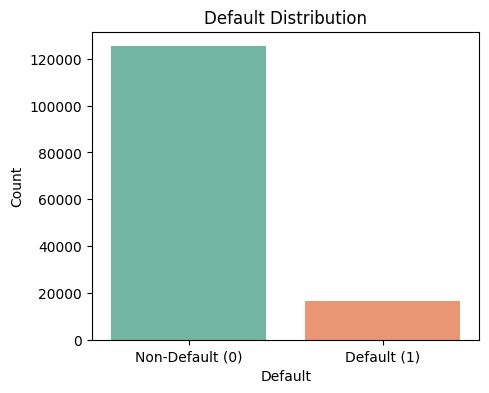

In [ ]:
# Check class distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Default', palette='Set2')
plt.title("Default Distribution")
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'])
plt.ylabel("Count")
plt.show()

In [ ]:
#  Default rate
default_rate = df['Default'].mean()
print(f" Overall Default Rate: {default_rate:.2%}")

 Overall Default Rate: 11.54%


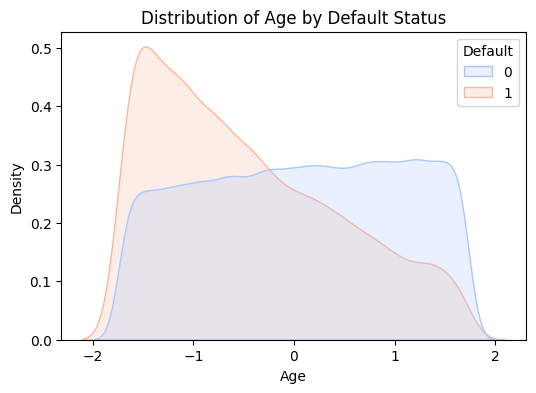

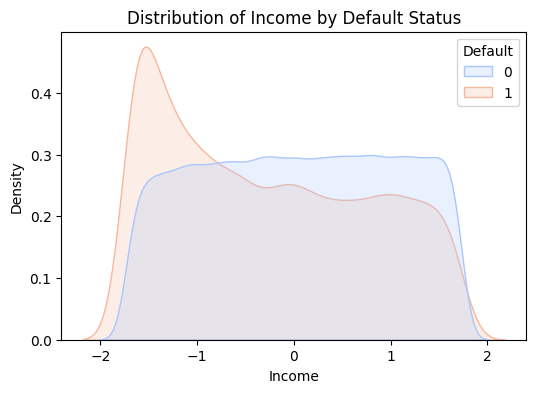

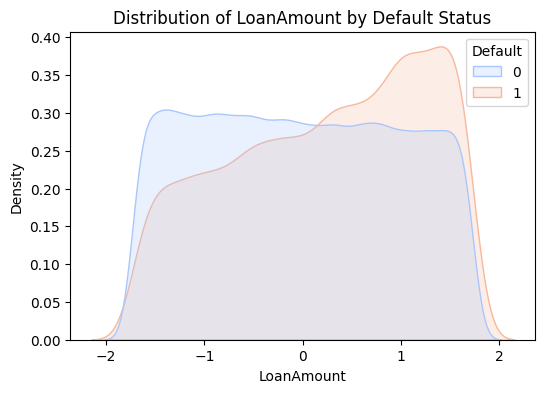

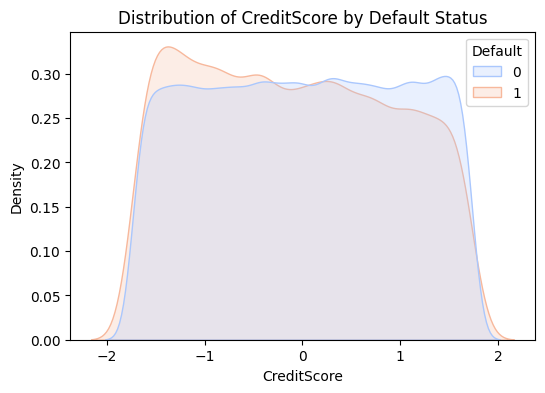

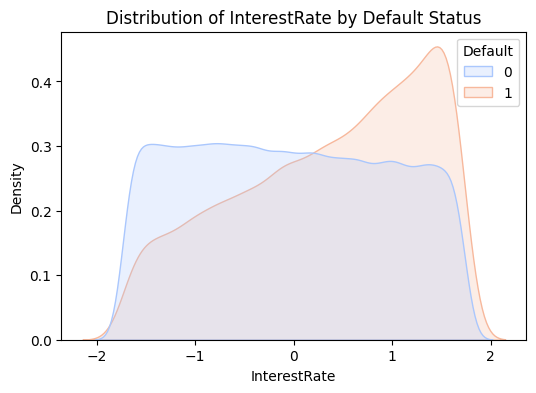

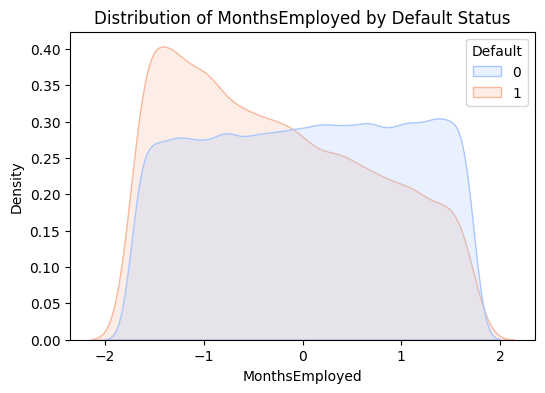

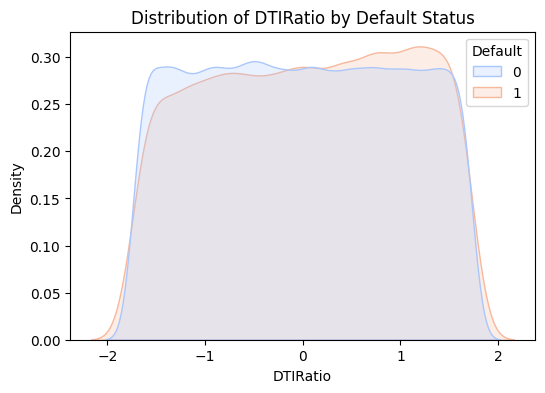

In [ ]:
# Numeric Feature Distributions by Default
num_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'MonthsEmployed', 'DTIRatio']

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='Default', fill=True, common_norm=False, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Default Status')
    plt.show()

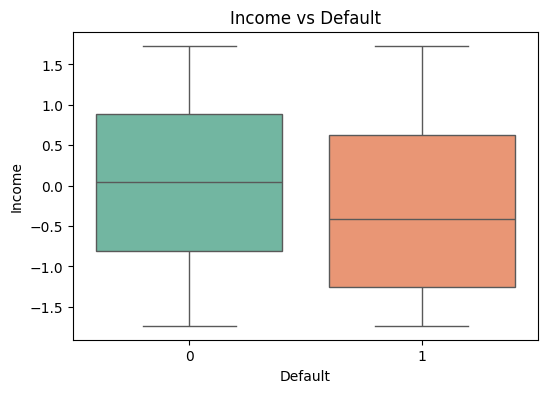

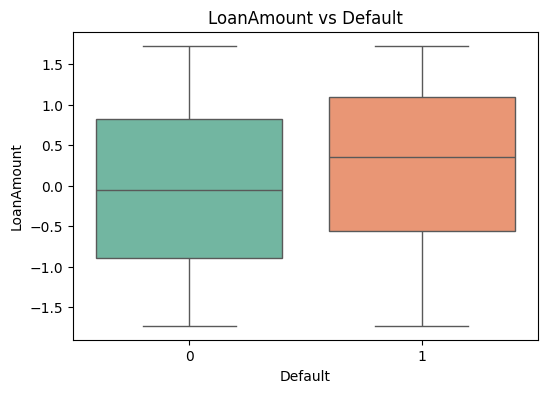

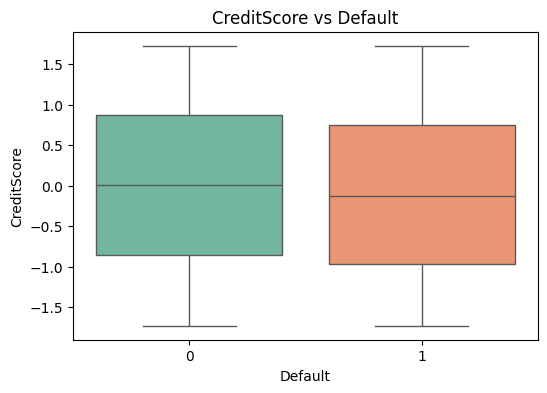

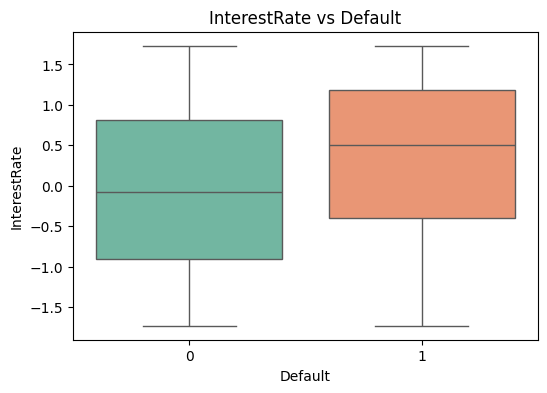

In [ ]:
# Boxplots to see outliers and trends
for feature in ['Income', 'LoanAmount', 'CreditScore', 'InterestRate']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Default', y=feature, palette='Set2')
    plt.title(f'{feature} vs Default')
    plt.show()

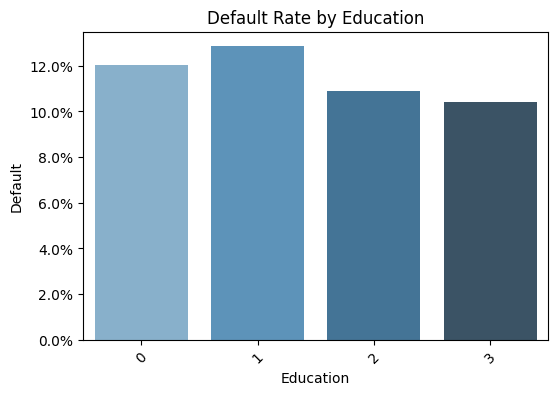

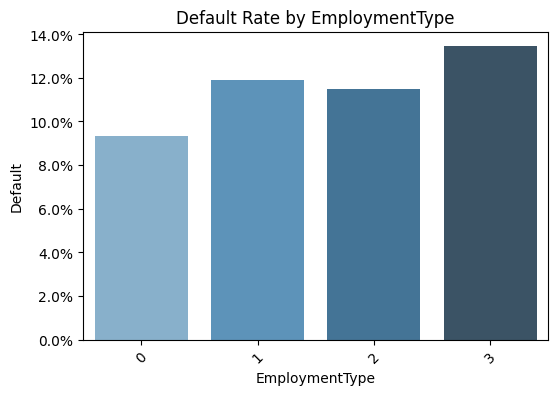

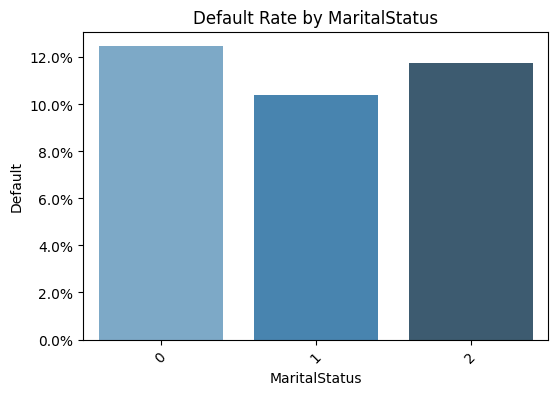

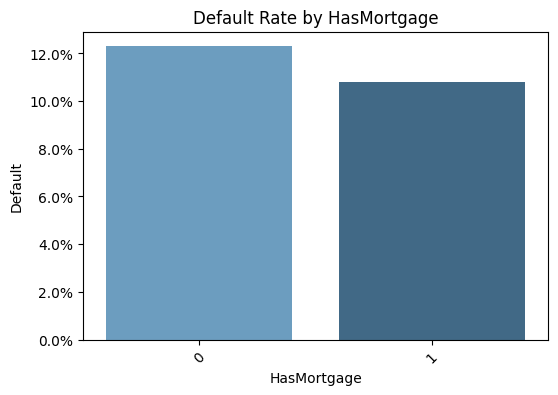

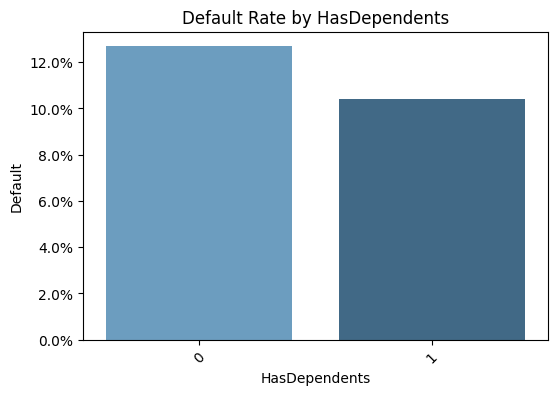

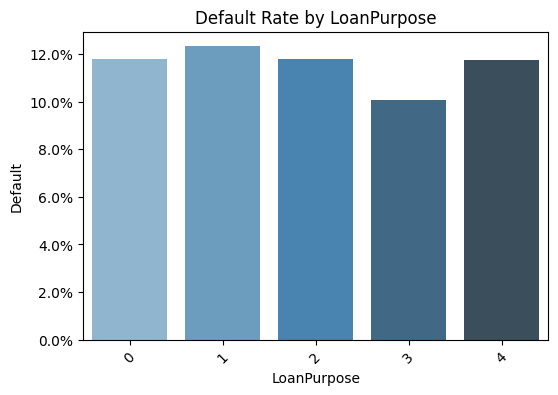

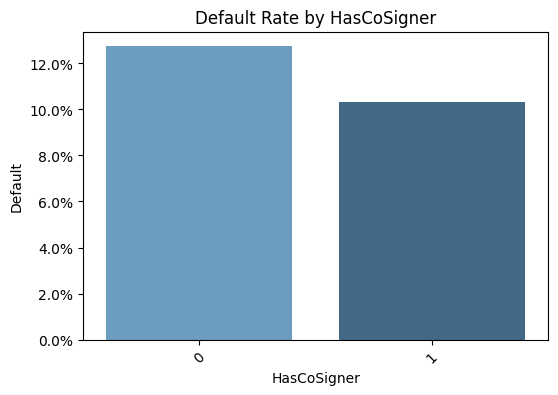

In [ ]:
# Categorical vs Default (barplots)
cat_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in cat_features:
    plt.figure(figsize=(6, 4))
    default_rates = df.groupby(col)['Default'].mean().reset_index()
    sns.barplot(x=col, y='Default', data=default_rates, palette='Blues_d')
    plt.title(f'Default Rate by {col}')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.show()

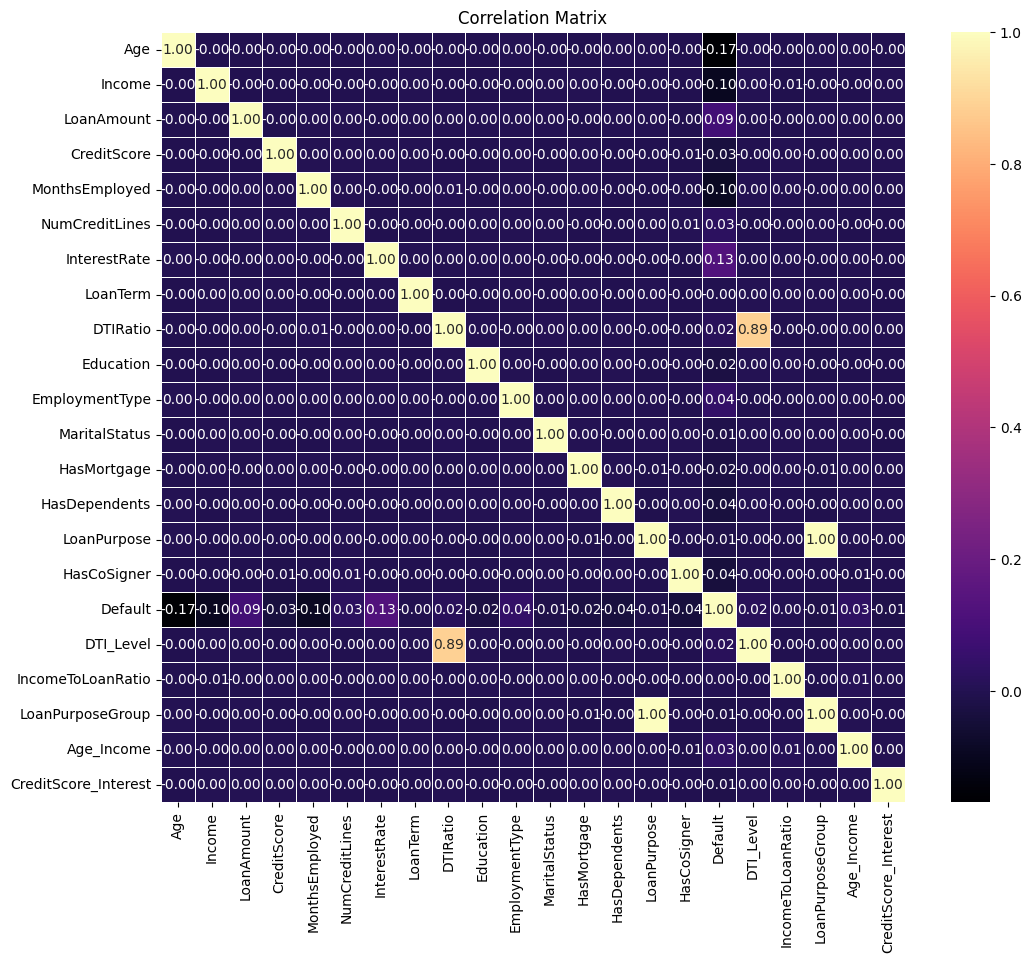

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Focus on correlation with 'Default'
default_corr = correlation_matrix['Default'].drop('Default')  # remove self-correlation

# Top 15 most correlated features (absolute value)
top_15_features = default_corr.abs().sort_values(ascending=False).head(15)

# Show actual correlations with sign
top_15_signed = default_corr.loc[top_15_features.index]

print("Top 15 Features Most Correlated with Default:\n")
print(top_15_signed)

Top 15 Features Most Correlated with Default:

Age              -0.168842
InterestRate      0.127644
Income           -0.099843
MonthsEmployed   -0.095654
LoanAmount        0.085356
EmploymentType    0.041441
HasCoSigner      -0.037702
HasDependents    -0.035788
Age_Income        0.033906
CreditScore      -0.032548
NumCreditLines    0.025317
Education        -0.023762
HasMortgage      -0.023738
DTIRatio          0.017784
DTI_Level         0.015767
Name: Default, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Select top 15 features
selected_features = [
    'Age', 'InterestRate', 'Income', 'MonthsEmployed', 'LoanAmount',
    'EmploymentType', 'HasCoSigner', 'HasDependents', 'CreditScore',
    'Age_Income', 'NumCreditLines', 'HasMortgage', 'Education',
    'DTIRatio', 'DTI_Level'
]

# Define features and target
X = df[selected_features]
y = df['Default']

# Apply SMOTE to the entire dataset BEFORE splitting
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check balance after SMOTE
print("After SMOTE on full data:", pd.Series(y_smote).value_counts().to_dict())

# Train-test split on SMOTE-resampled data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42, stratify=y_smote)

# Show resulting shapes
print("Training shape:", X_train.shape)
print("Test shape    :", X_test.shape)

After SMOTE on full data: {0: 125311, 1: 125311}
Training shape: (187966, 15)
Test shape    : (62656, 15)


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Model"):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n📋 Evaluation Report for {model_name}")
    print("-" * 40)
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall        : {rec:.4f}")
    print(f"F1-score      : {f1:.4f}")
    print(f"ROC-AUC Score : {roc_auc:.4f}")
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, y_pred, y_prob


📋 Evaluation Report for Logistic Regression
----------------------------------------
Accuracy      : 0.7099
Precision     : 0.7076
Recall        : 0.7154
F1-score      : 0.7115
ROC-AUC Score : 0.7843

 Classification Report:
              precision    recall  f1-score   support

           0     0.7122    0.7044    0.7083     31328
           1     0.7076    0.7154    0.7115     31328

    accuracy                         0.7099     62656
   macro avg     0.7099    0.7099    0.7099     62656
weighted avg     0.7099    0.7099    0.7099     62656



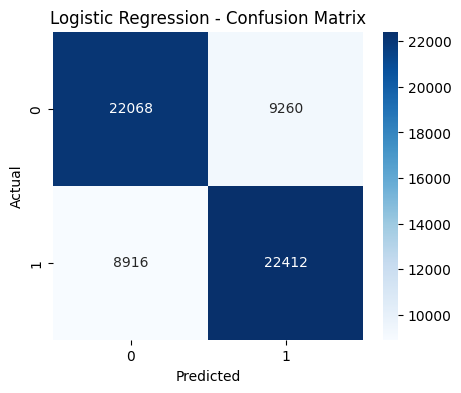

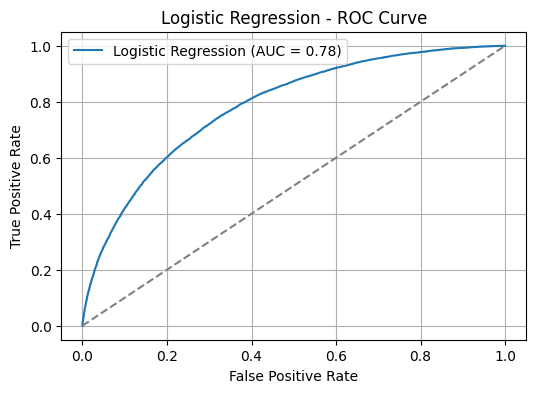

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
trained_log, y_pred_log, y_prob_log = train_and_evaluate(
    log_model, X_train, X_test, y_train, y_test, model_name="Logistic Regression"
)


📋 Evaluation Report for Random Forest
----------------------------------------
Accuracy      : 0.8963
Precision     : 0.8843
Recall        : 0.9119
F1-score      : 0.8979
ROC-AUC Score : 0.9628

 Classification Report:
              precision    recall  f1-score   support

           0     0.9090    0.8806    0.8946     31328
           1     0.8843    0.9119    0.8979     31328

    accuracy                         0.8963     62656
   macro avg     0.8966    0.8963    0.8962     62656
weighted avg     0.8966    0.8963    0.8962     62656



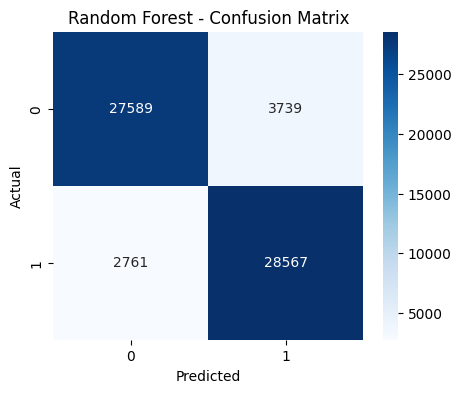

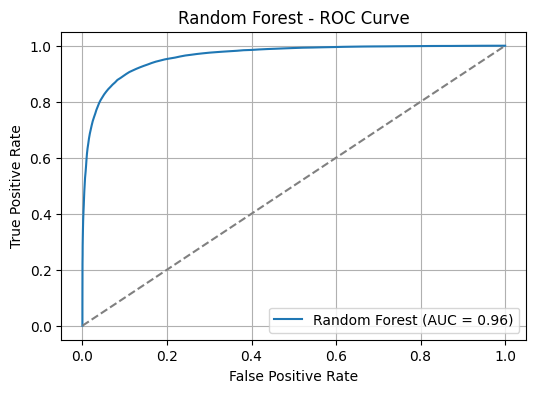

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight= 'balanced'
)

# Train and evaluate
rf_model, rf_y_pred, rf_y_prob = train_and_evaluate(
    model=rf_model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model_name="Random Forest"
)

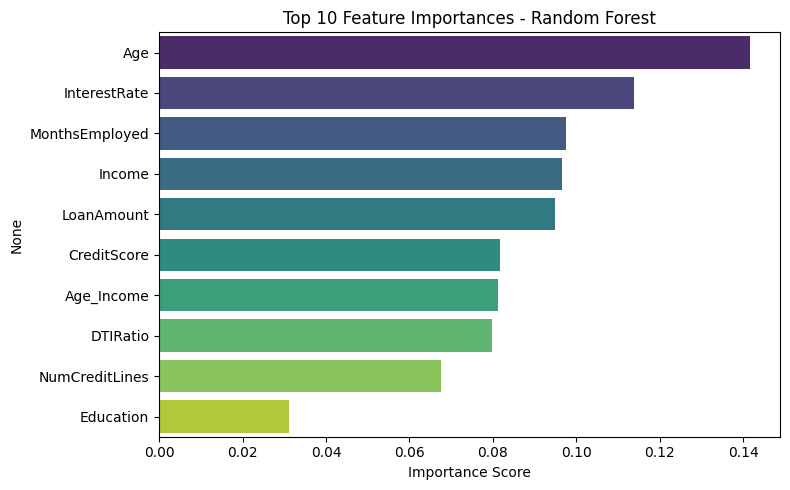

In [ ]:
# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_importances = importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_importances.values, y=top_importances.index, palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample

# Downsample training data for faster tuning
X_train_sample, y_train_sample = resample(
    X_train, y_train,
    n_samples=30000,
    stratify=y_train,
    random_state=42
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Initialize base model
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,       # Faster
    verbose=1,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit on training data (after SMOTE)
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

print(f"\n RandomizedSearchCV completed in {(end_time - start_time):.2f} seconds.")
print("\n Best Parameters Found:")
print(random_search.best_params_)

# Evaluate on test data
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Performance Report
print("\n Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 RandomizedSearchCV completed in 934.06 seconds.

 Best Parameters Found:
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

 Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     31328
           1       0.85      0.89      0.87     31328

    accuracy                           0.87     62656
   macro avg       0.87      0.87      0.87     62656
weighted avg       0.87      0.87      0.87     62656

ROC-AUC Score: 0.9427


ROC-AUC Score: 0.9427


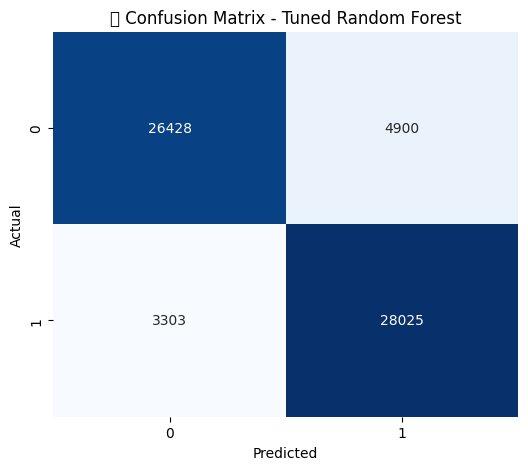

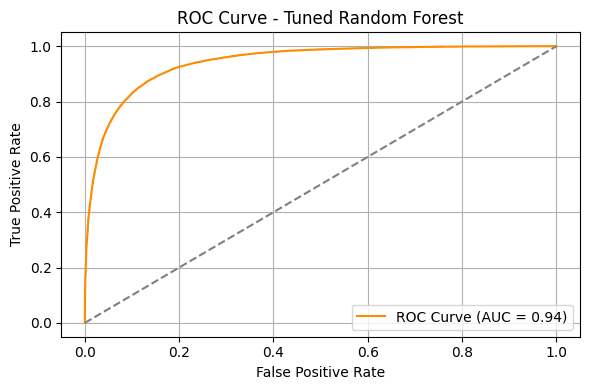

In [ ]:
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("🔍 Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# OC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Tuned Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import joblib
import os

# Create directory to store models
os.makedirs("saved_models", exist_ok=True)

# Save Logistic Regression model
joblib.dump(log_model, "saved_models/logistic_regression_model.pkl")

# Save initial Random Forest model
joblib.dump(rf_model, "saved_models/random_forest_model.pkl")

# Save Tuned Random Forest model
joblib.dump(best_rf, "saved_models/tuned_random_forest_model.pkl")

print(" All models saved successfully to the 'saved_models' directory.")

 All models saved successfully to the 'saved_models' directory.


In [ ]:
"""
# Load models
logistic_model_loaded = joblib.load("saved_models/logistic_regression_model.pkl")
rf_model_loaded = joblib.load("saved_models/random_forest_model.pkl")
tuned_rf_model_loaded = joblib.load("saved_models/tuned_random_forest_model.pkl")
"""

'\n# Load models\nlogistic_model_loaded = joblib.load("saved_models/logistic_regression_model.pkl")\nrf_model_loaded = joblib.load("saved_models/random_forest_model.pkl")\ntuned_rf_model_loaded = joblib.load("saved_models/tuned_random_forest_model.pkl")\n'